In [1]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import nltk

import re

from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer

wordnet=WordNetLemmatizer()

In [2]:
df=pd.read_csv('Data Set - industrial_safety_and_health_database_with_accidents_description.csv')

df.head(5)

,Unnamed: 0,Data,Countries,Local,Industry Sector,Accident Level,Potential Accident Level,Genre,Employee or Third Party,Critical Risk,Description
0,0,2016-01-01 00:00:00,Country_01,Local_01,Mining,I,IV,Male,Third Party,Pressed,While removing the drill rod of the Jumbo 08 f...
1,1,2016-01-02 00:00:00,Country_02,Local_02,Mining,I,IV,Male,Employee,Pressurized Systems,During the activation of a sodium sulphide pum...
2,2,2016-01-06 00:00:00,Country_01,Local_03,Mining,I,III,Male,Third Party (Remote),Manual Tools,In the sub-station MILPO located at level +170...
3,3,2016-01-08 00:00:00,Country_01,Local_04,Mining,I,I,Male,Third Party,Others,Being 9:45 am. approximately in the Nv. 1880 C...
4,4,2016-01-10 00:00:00,Country_01,Local_04,Mining,IV,IV,Male,Third Party,Others,Approximately at 11:45 a.m. in circumstances t...


In [3]:
### we'll remove description and unnamed column 

df_text=df['Description']

In [4]:
df_text=pd.DataFrame(df_text)


In [5]:
df_text['Description']=df_text.Description.apply(lambda s:s.lower())

df_text['Description']=df_text.Description.apply(lambda s: re.sub("[^A-Za-z]"," ",s))


stopword=set(stopwords.words('english'))

df_text['Description']=df_text.Description.apply(lambda s: " ".join([words for words in s.split() if words not in stopword]))

df_text['lemma']=df_text.Description.apply(lambda s: " ".join([wordnet.lemmatize(words) for words in s.split()]))

df_text

,Description,lemma
0,removing drill rod jumbo maintenance superviso...,removing drill rod jumbo maintenance superviso...
1,activation sodium sulphide pump piping uncoupl...,activation sodium sulphide pump piping uncoupl...
2,sub station milpo located level collaborator e...,sub station milpo located level collaborator e...
3,approximately nv cx ob personnel begins task u...,approximately nv cx ob personnel begin task un...
4,approximately circumstances mechanics anthony ...,approximately circumstance mechanic anthony gr...
...,...,...
420,approximately approximately lifting kelly hq t...,approximately approximately lifting kelly hq t...
421,collaborator moved infrastructure office julio...,collaborator moved infrastructure office julio...
422,environmental monitoring activity area employe...,environmental monitoring activity area employe...
423,employee performed activity stripping cathodes...,employee performed activity stripping cathode ...


In [6]:
bow=" ".join(str(x) for x in df_text['lemma'])


from nltk.util import ngrams
 
# Function to generate n-grams from sentences.

def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]
 
gram_2= extract_ngrams(bow, 2)
gram_3= extract_ngrams(bow, 3)
gram_1= extract_ngrams(bow, 1)

In [7]:
gram_2= pd.DataFrame(extract_ngrams(bow, 2))
gram_2.value_counts()

left hand                   70
right hand                  57
time accident               56
causing injury              55
finger left                 25
                            ..
performing manual            1
performing maneuver          1
performing magnetometric     1
performing mag               1
abb furnace                  1
Length: 10976, dtype: int64

In [8]:
gram_3= pd.DataFrame(extract_ngrams(bow, 3))
gram_3.value_counts()

finger left hand            24
cm x cm                     16
causing injury described    15
finger right hand           14
injury time accident        13
                            ..
person used epp              1
person step false            1
person retracts inner        1
person producing injury      1
abb furnace cat              1
Length: 12752, dtype: int64

In [9]:
gram_1= pd.DataFrame(extract_ngrams(bow, 1))
gram_1.value_counts()

employee         183
hand             181
causing          166
left             160
right            155
                ... 
manifestation      1
manifested         1
manipulate         1
manipulates        1
abb                1
Length: 2791, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

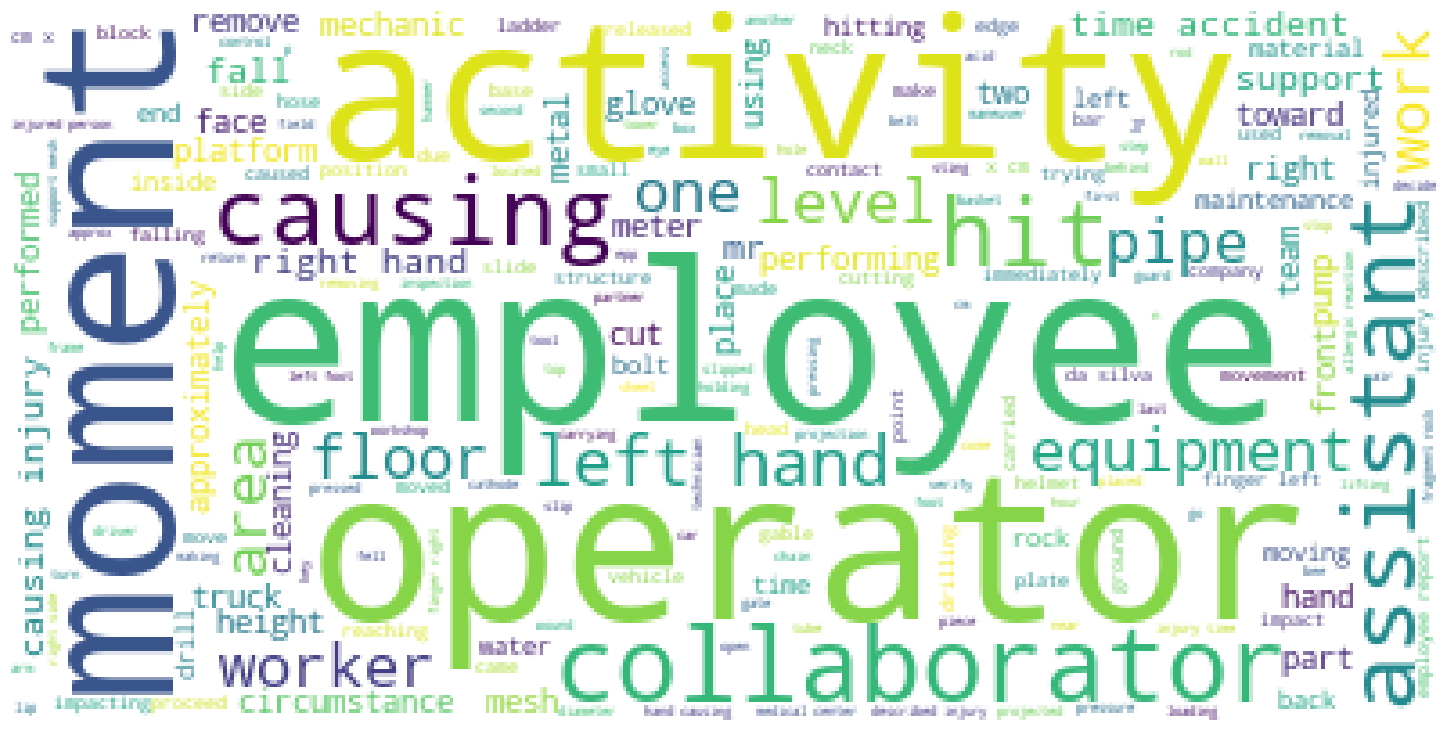

In [10]:
from wordcloud import WordCloud

wc=WordCloud(background_color='white').generate(bow)

plt.figure(figsize=(20,10))
plt.imshow(wc)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show

In [11]:
import os
os.chdir("C:\\Users\\sujeet kumar\\AIML-GreatLearningprojects\\Capstone Project\\Capstone NLP Project 2 Chat Bot")
wc.to_file('wordcloud.png')

#### create Matrix using TFIDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf=TfidfVectorizer( max_features=50,norm='l2')

tfidf_model=tfidf.fit_transform(df_text['lemma']).toarray()



In [13]:
tfidf.get_feature_names()

['accident',
 'activity',
 'approximately',
 'area',
 'assistant',
 'causing',
 'circumstance',
 'cm',
 'collaborator',
 'cut',
 'described',
 'employee',
 'equipment',
 'face',
 'fall',
 'finger',
 'floor',
 'glove',
 'hand',
 'height',
 'hit',
 'injured',
 'injury',
 'kg',
 'left',
 'level',
 'medical',
 'mesh',
 'metal',
 'meter',
 'moment',
 'mr',
 'one',
 'operator',
 'part',
 'pipe',
 'place',
 'pump',
 'right',
 'rock',
 'safety',
 'side',
 'support',
 'team',
 'time',
 'towards',
 'truck',
 'used',
 'work',
 'worker']

In [14]:
tfidf_model

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.26814366,
        0.        ],
       ...,
       [0.        , 0.29827651, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.28155976, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [15]:
tfs = pd.DataFrame(tfidf_model, columns=["tfidf_" + n for n in tfidf.get_feature_names()])

tfs.shape

(425, 50)

In [16]:
tfs

,tfidf_accident,tfidf_activity,tfidf_approximately,tfidf_area,tfidf_assistant,tfidf_causing,tfidf_circumstance,tfidf_cm,tfidf_collaborator,tfidf_cut,...,tfidf_safety,tfidf_side,tfidf_support,tfidf_team,tfidf_time,tfidf_towards,tfidf_truck,tfidf_used,tfidf_work,tfidf_worker
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.849675,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
1,0.0,0.000000,0.000000,0.606189,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000,0.277923,0.000000,0.193852,0.000000,0.000000,0.547221,0.000000,...,0.304857,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.268144,0.000000
3,0.0,0.000000,0.366215,0.000000,0.354815,0.229882,0.000000,0.000000,0.324465,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
4,0.0,0.000000,0.247931,0.000000,0.000000,0.155632,0.252958,0.524264,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.229264
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420,0.0,0.000000,0.709871,0.000000,0.343887,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.387013,0.0,0.0,0.000000,0.000000
421,0.0,0.000000,0.000000,0.000000,0.000000,0.523318,0.000000,0.000000,0.369317,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
422,0.0,0.298277,0.000000,0.351722,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000
423,0.0,0.281560,0.000000,0.000000,0.000000,0.231578,0.000000,0.000000,0.000000,0.390047,...,0.000000,0.392981,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000


In [17]:
tfs.to_csv('tfidf.csv')

## now we'll create word2vec model and matrix

###### a. Word2vec model

In [18]:
from gensim.models import Word2Vec 

df_text['lemma_token']=[nltk.word_tokenize(word) for word in df_text['lemma']]

model=Word2Vec(df_text['lemma_token'],min_count=20)

words=model.wv.key_to_index

len(words)

130

In [19]:
model.wv.most_similar('injury')

[('causing', 0.9991806745529175),
 ('hand', 0.9990702867507935),
 ('left', 0.9990379214286804),
 ('fall', 0.9990086555480957),
 ('moment', 0.9989953637123108),
 ('operator', 0.9989926218986511),
 ('worker', 0.9989060163497925),
 ('kg', 0.9988980293273926),
 ('time', 0.9988899827003479),
 ('collaborator', 0.9988883137702942)]

In [20]:
model.save('word2vecmodel.bin')